In [2]:
import torch
import time
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose 
import matplotlib.pyplot as plt
t_init = time.time()

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
batch_size = 64

11.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

34.0%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

57.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

81.3%IOPub message rate exceede

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



30.1%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

119.3%


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, pin_memory=True)

for X, y in test_dataloader:
  print("Shape of X [N, C, H, W]: ", X.shape, X.dtype)
  print("Shape of y: ", y.shape, y.dtype)
  break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28]) torch.float32
Shape of y:  torch.Size([64]) torch.int64


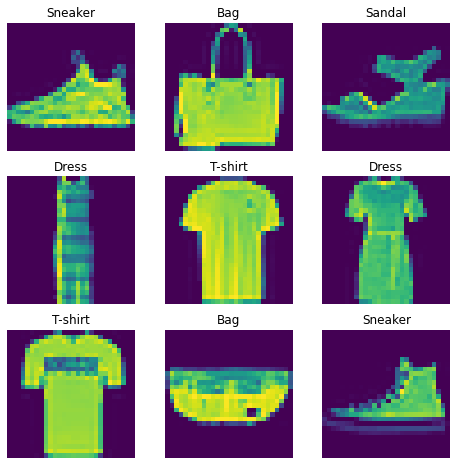

In [5]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankel Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
  sample_index = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_index]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze())

In [ ]:
device = "cuda" if torch.cuda.is_available()  else "cpu"
print("Using {} device".format(device))

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
        nn.ReLU()
    )
  def forward(self, x):
    #print("Check if input is CUDA", x.is_cuda)
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

Using cuda device


In [ ]:
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch_idx, (X,y) in enumerate(dataloader): 
    X = X.to(device)
    y = y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 100 ==0:
      loss, current = loss.item(), batch_idx*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct +=(pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1} \n----------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print("Done!")

elapsed = time.time() - t_init
print(f"Elapsed time is {elapsed}")

Epoch 1 
----------------------------------
loss: 2.308155 [    0/60000]
loss: 2.302786 [ 6400/60000]
loss: 2.301269 [12800/60000]
loss: 2.292064 [19200/60000]
loss: 2.290531 [25600/60000]
loss: 2.298068 [32000/60000]
loss: 2.273889 [38400/60000]
loss: 2.285407 [44800/60000]
loss: 2.276023 [51200/60000]
loss: 2.244777 [57600/60000]
Test error: 
 Accuracy: 38.1%, Avg loss: 2.256843 

Epoch 2 
----------------------------------
loss: 2.273985 [    0/60000]
loss: 2.257574 [ 6400/60000]
loss: 2.261120 [12800/60000]
loss: 2.232257 [19200/60000]
loss: 2.218608 [25600/60000]
loss: 2.270734 [32000/60000]
loss: 2.199564 [38400/60000]
loss: 2.236983 [44800/60000]
loss: 2.223745 [51200/60000]
loss: 2.166630 [57600/60000]
Test error: 
 Accuracy: 41.2%, Avg loss: 2.186580 

Epoch 3 
----------------------------------
loss: 2.231881 [    0/60000]
loss: 2.196212 [ 6400/60000]
loss: 2.207350 [12800/60000]
loss: 2.149095 [19200/60000]
loss: 2.127003 [25600/60000]
loss: 2.236593 [32000/60000]
loss: 2.09

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model to model.pth")

Saved PyTorch Model to model.pth


In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
           "T-shirt/top",
           "Trouser",
           "Pullover",
           "Dress",
           "Coat",
           "Sandal",
           "Shirt",
           "Sneaker",
           "Bag",
           "Ankle Boot",
]
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
  pred = model(x)
  predicted = classes[pred.argmax(1)] 
  actual= classes[y]
  print(f"Predicted: {predicted}, Actual: {actual}")

Predicted: Bag, Actual: Ankle Boot


In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [ ]:
ls

'colab-tutorial.ipynb의 사본'        mycsv.csv
'colab-tutorial.ipynb의 사본 (1)'   'mycsv - Sheet1.csv'
'colab-tutorial.ipynb의 사본 (2)'   'mycsv - Sheet1.gsheet'
'Copy of colab-tutorial (1).ipynb'   My_quickstart_tutorial.ipynb
'Copy of colab-tutorial (2).ipynb'   pytorch1.ipynb
'Copy of colab-tutorial.ipynb'       pytorch2.ipynb
 data/                               Sample.ipynb
 example1.ipynb                      tmp.csv
 model.pth                           Untitled0.ipynb
 mycsv2.csv                          Untitled1.ipynb
 mycsv3.csv                          Untitled2.ipynb
 MyCsv4.csv                          Untitled3.ipynb


In [ ]:
import csv

with open('/content/mnt/MyDrive/Colab Notebooks/mycsv2.csv', mode='w') as csv_file:
    fieldnames = ['emp_name', 'dept', 'birth_month']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

In [ ]:
import torch
import pandas as pd
import numpy as np
import csv

DATASIZE = 100000

x = np.linspace(-10, 10, DATASIZE)
noise = np.random.normal(scale=0.05, size=len(x))
y = 1.6*x
data = np.column_stack((x,y))
print(np.shape(data))

df =pd.DataFrame(data=data, columns=['input','output'])
print(df.head())

df.to_csv('MyCsv4.csv', index=False)

(100000, 2)
     input    output
0 -10.0000 -16.00000
1  -9.9998 -15.99968
2  -9.9996 -15.99936
3  -9.9994 -15.99904
4  -9.9992 -15.99872


In [ ]:
import torch
import pandas as pd
import numpy as np

df2 = pd.read_csv('MyCsv4.csv')
df2 = df2.to_numpy()

In [ ]:
xx = df2[:,0]
yy = df2[:,1]
a = 0
b = np.random.randn()
c = 0
d = 0

BATCH_SIZE = 100
learning_rate = 1e-2

loss_s = np.zeros(len(xx)//BATCH_SIZE)
for t in range(len(xx)//BATCH_SIZE):
  batch_idx = np.random.randint(0,BATCH_SIZE-1, size=BATCH_SIZE, dtype=int)
  x = xx[batch_idx]
  y = yy[batch_idx]

  # Forward pass: compute predicted y
  # y = a + b x + c x^2 + d x^3
  y_pred = a + b * x + c * x ** 2 + d * x ** 3

  # Compute and print loss
  loss = 1/len(x)*np.square(y_pred-y).sum()
  loss = np.around(loss, decimals = 12)
  loss_s[t]=loss
  if t % 100 == 99:
      print(t, loss)

  # Backprop to compute gradients of a, b, c, d with respect to loss
  grad_y_pred = 1/len(x)*2.0 * (y_pred-y)
  grad_y_pred = np.around(grad_y_pred,decimals=11)
  grad_a = grad_y_pred.sum()
  grad_a = np.sign(grad_a)*np.min([np.abs(grad_a),0])
  grad_b = (grad_y_pred * x).sum()
  grad_b = np.sign(grad_b)*np.min([np.abs(grad_b),1])
  grad_c = (grad_y_pred * x ** 2).sum()
  grad_c = np.sign(grad_c)*np.min([np.abs(grad_c),1])
  grad_d = (grad_y_pred * x ** 3).sum()
  grad_d = np.sign(grad_d)*np.min([np.abs(grad_d),1])
  print('gradA={:.5f}, gradB={:.5f}, gradC={:.5f}, gradD={:.5f}'.format(grad_a, grad_b, grad_c, grad_d))

  # Update weights
  a = a - learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d
  print('a={:.5f}, b={:.5f}, c={:.5f}, d={:.5f}'.format(a,b,c,d))
  print('Loss={:.5f}'.format(loss))
  print('-------------------------')




gradA=0.00000, gradB=-1.00000, gradC=1.00000, gradD=-1.00000
a=0.00000, b=-0.66651, c=-0.01000, d=0.01000
Loss=517.25129
-------------------------
gradA=0.00000, gradB=-1.00000, gradC=1.00000, gradD=-1.00000
a=0.00000, b=-0.65651, c=-0.02000, d=0.02000
Loss=136.26521
-------------------------
gradA=0.00000, gradB=-1.00000, gradC=1.00000, gradD=-1.00000
a=0.00000, b=-0.64651, c=-0.03000, d=0.03000
Loss=0.36803
-------------------------
gradA=-0.00000, gradB=1.00000, gradC=-1.00000, gradD=1.00000
a=0.00000, b=-0.65651, c=-0.02000, d=0.02000
Loss=109.51942
-------------------------
gradA=0.00000, gradB=-1.00000, gradC=1.00000, gradD=-1.00000
a=0.00000, b=-0.64651, c=-0.03000, d=0.03000
Loss=0.36686
-------------------------
gradA=-0.00000, gradB=1.00000, gradC=-1.00000, gradD=1.00000
a=0.00000, b=-0.65651, c=-0.02000, d=0.02000
Loss=109.47754
-------------------------
gradA=0.00000, gradB=-1.00000, gradC=1.00000, gradD=-1.00000
a=0.00000, b=-0.64651, c=-0.03000, d=0.03000
Loss=0.36735
---

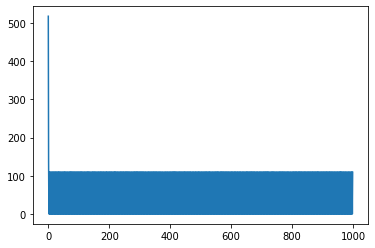

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_s)

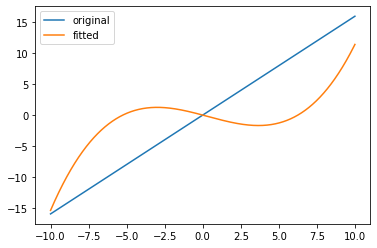

In [ ]:
plt.plot(xx,yy)
plt.plot(xx, a + b*xx + c*xx**2 + d*xx**3)
plt.legend(['original','fitted'])